<a href="https://www.kaggle.com/code/sagu13cs/mushroom-classification-svm?scriptVersionId=206034465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mushroom Classification - Support Vector Machines


In [34]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
mushroom_data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [4]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Preprocessing Data

In [5]:
target = mushroom_data['class']
inputs = mushroom_data.drop(['class'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=24, stratify=target)

In [7]:
y_train.value_counts()

class
e    3366
p    3133
Name: count, dtype: int64

In [8]:
y_test.value_counts()

class
e    842
p    783
Name: count, dtype: int64

# Encode categorical features to numeric


In [9]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

In [16]:
x_train_transf = enc_i.fit_transform(X_train)
x_test_transf = enc_i.fit_transform(X_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.fit_transform(y_test)

In [18]:
x_train_transf

array([[2., 3., 8., ..., 2., 4., 1.],
       [2., 0., 3., ..., 2., 5., 0.],
       [2., 3., 2., ..., 3., 4., 0.],
       ...,
       [2., 2., 2., ..., 7., 4., 2.],
       [5., 2., 5., ..., 3., 3., 0.],
       [2., 0., 9., ..., 3., 4., 0.]])

In [19]:
x_test_transf

array([[1., 2., 9., ..., 1., 5., 1.],
       [1., 1., 3., ..., 2., 0., 1.],
       [1., 0., 3., ..., 1., 5., 4.],
       ...,
       [4., 1., 4., ..., 2., 0., 1.],
       [4., 1., 9., ..., 3., 3., 3.],
       [4., 2., 3., ..., 1., 4., 4.]])

In [22]:
scaling = MinMaxScaler(feature_range= (-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

In [25]:
x_train_rescaled

array([[-0.2       ,  1.        ,  0.77777778, ..., -0.5       ,
         0.6       , -0.66666667],
       [-0.2       , -1.        , -0.33333333, ..., -0.5       ,
         1.        , -1.        ],
       [-0.2       ,  1.        , -0.55555556, ..., -0.25      ,
         0.6       , -1.        ],
       ...,
       [-0.2       ,  0.33333333, -0.55555556, ...,  0.75      ,
         0.6       , -0.33333333],
       [ 1.        ,  0.33333333,  0.11111111, ..., -0.25      ,
         0.2       , -1.        ],
       [-0.2       , -1.        ,  1.        , ..., -0.25      ,
         0.6       , -1.        ]])

### Step 1: Implement Linear SVM

In [29]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C).fit(x_train_rescaled, y_train_transf)

In [30]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

# Evaluation

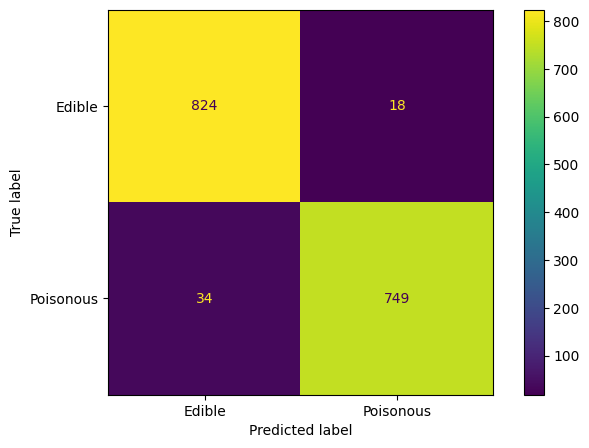

In [32]:
fix, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
        confusion_matrix(y_test_transf,y_pred_test),
        display_labels=["Edible","Poisonous"])

cmp.plot(ax=ax)

In [33]:
print(classification_report(y_test_transf,y_pred_test,target_names=["Edible","Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.96      0.98      0.97       842
   Poisonous       0.98      0.96      0.97       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



#### We are classfying 4% of poisonous mushrooms as Edible. Using crossvalidation, let's increase this recall metric from 96%, to decrease the poisonous misclassifcation

In [35]:
tuned_parameters = [
    {"kernel":["linear"], "C":[1,10]},
    {"kernel":["poly"], "C":[1,10]},
    {"kernel":["rbf"], "gamma":[1e-3,1e-4], "C":[1,10]}
]


In [36]:
scores = ["precision","recall"]

In [37]:
for score in scores:
    print("# Tuning hyper-params for %s" % score)
    print()
    
    clf = GridSearchCV(svm.SVC(),tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)
    
    print("Best params set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std*2, params))
    print()
    
    print("Detailed classification report:")
    print()
    print("The model is trained on full development set:")
    print("The scores are computed on full evaluation set:")
    print()
    
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true,y_pred))
    print()

# Tuning hyper-params for precision

Best params set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.963 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.979 (+/-0.017) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.930 (+/-0.013) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.897 (+/-0.013) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.950 (+/-0.012) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.930 (+/-0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on full development set:
The scores are computed on full evaluation set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weig